# **Project on "Prediction Flight Delay"**

This project aims to develop a machine learning model to predict the probability of a flight being
delayed/cancelled based on historical data. By analysing features such as airline, flight schedules, airport congestion,
and seasonal trends, the project seeks to identify key factors contributing to delays and provide customers to have insight
on their flight carrier and their journey delay status. The outcome will include a predictive model and UI to get
information about the delays and Dashboard for Historical data visualization

## **Analysis on Flight Data**

In [3]:
import pandas as pd

# Read the CSV file
df = pd.read_parquet("/content/balanced_sampled_flight_data_all_years.parquet")

# Display the first few rows
print(df.head())


  FlightDate                 Airline Origin Dest  Cancelled  Diverted  \
0 2018-01-01    Alaska Airlines Inc.    LAX  SEA      False     False   
1 2018-01-01  Southwest Airlines Co.    DEN  SFO      False     False   
2 2018-01-01   United Air Lines Inc.    DEN  SFO      False     False   
3 2018-01-01    Delta Air Lines Inc.    OAK  SLC      False     False   
4 2018-01-01   United Air Lines Inc.    DFW  LAX      False     False   

   CRSDepTime DepTime  DepDelayMinutes  DepDelay  ...  CRSArrTime  ArrDelay  \
0        2335   00:57             82.0      82.0  ...         233      50.0   
1        2225   01:18            173.0     173.0  ...          15     154.0   
2         537   05:33              0.0      -4.0  ...         722      -8.0   
3         600   05:59              0.0      -1.0  ...         850     -12.0   
4         545   05:39              0.0      -6.0  ...         734     -14.0   

   ArrDel15  ArrivalDelayGroups  ArrTimeBlk  DistanceGroup  \
0       1.0             

### **Checking Null Values in Dataset**

In [4]:
# Check for null values in each column
null_values = df.isnull().sum()

# Display null values
print(null_values)

FlightDate                0
Airline                   0
Origin                    0
Dest                      0
Cancelled                 0
                      ...  
DistanceGroup             0
DivAirportLandings        0
Day                       0
Hour                      0
Date                  90120
Length: 64, dtype: int64


In [5]:
df  = df.iloc[:]

display(df)


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,Day,Hour,Date
0,2018-01-01,Alaska Airlines Inc.,LAX,SEA,False,False,2335,00:57,82.0,82.0,...,233,50.0,1.0,3.0,0001-0559,4,0.0,2018-01-01,0.0,1.0
1,2018-01-01,Southwest Airlines Co.,DEN,SFO,False,False,2225,01:18,173.0,173.0,...,15,154.0,1.0,10.0,0001-0559,4,0.0,2018-01-01,1.0,1.0
2,2018-01-01,United Air Lines Inc.,DEN,SFO,False,False,537,05:33,0.0,-4.0,...,722,-8.0,0.0,-1.0,0700-0759,4,0.0,2018-01-01,5.0,1.0
3,2018-01-01,Delta Air Lines Inc.,OAK,SLC,False,False,600,05:59,0.0,-1.0,...,850,-12.0,0.0,-1.0,0800-0859,3,0.0,2018-01-01,5.0,1.0
4,2018-01-01,United Air Lines Inc.,DFW,LAX,False,False,545,05:39,0.0,-6.0,...,734,-14.0,0.0,-1.0,0700-0759,5,0.0,2018-01-01,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748269,2022-07-31,Comair Inc.,CLT,GSP,False,False,2010,23:22,192.0,192.0,...,2056,189.0,1.0,12.0,2000-2059,1,0.0,2022-07-31,23.0,NaN
748270,2022-07-31,Delta Air Lines Inc.,PDX,ATL,False,False,2357,23:49,0.0,-8.0,...,730,-22.0,0.0,-2.0,0700-0759,9,0.0,2022-07-31,23.0,NaN
748271,2022-07-31,Spirit Air Lines,LAX,DFW,False,False,2315,23:38,23.0,23.0,...,427,14.0,0.0,0.0,0001-0559,5,0.0,2022-07-31,23.0,NaN
748272,2022-07-31,Delta Air Lines Inc.,LAS,ATL,False,False,2335,23:39,4.0,4.0,...,623,6.0,0.0,0.0,0600-0659,7,0.0,2022-07-31,23.0,NaN


### **Total Rows and Columns in DataSet**

In [6]:
# Get the number of rows and columns
rows, columns = df.shape

# Display the result
print(f"Total Rows: {rows}")
print(f"Total Columns: {columns}")

Total Rows: 748274
Total Columns: 64


In [7]:
# Get all column names
columns = df.columns

# Count total number of columns
column_count = len(columns)

# Display column names and count
print(f"Total Columns: {column_count}")
print("Column Names:")
print(columns.tolist())

Total Columns: 64
Column Names:
['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 

# **Define the required columns (replace "Delayed" with "ArrDel15")**

Columns Removed from the Original Dataset
The following columns were removed because they are not in the required list:

Marketing_Airline_Network
Operated_or_Branded_Code_Share_Partners
DOT_ID_Marketing_Airline
IATA_Code_Marketing_Airline
Flight_Number_Marketing_Airline
DOT_ID_Operating_Airline
IATA_Code_Operating_Airline
Tail_Number
Flight_Number_Operating_Airline
OriginAirportSeqID
OriginCityMarketID
OriginState
OriginStateFips
OriginWac
DestAirportSeqID
DestCityMarketID
DestStateFips
DestWac
DepTimeBlk
WheelsOn
ArrTimeBlk
DivAirportLandings
Day
Hour
Date



We removed these columns because they mostly contain IDs, codes, or other irrelevant information that do not contribute to your analysis.

In [9]:
import pandas as pd

# Read the CSV file
df = pd.read_parquet("/content/balanced_sampled_flight_data_all_years.parquet")

# Define the required columns (replace "Delayed" with "ArrDel15")
required_columns = [
    'FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime',
    'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime',
    'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
    'Operating_Airline', 'OriginAirportID', 'OriginCityName', 'OriginStateName', 'DestAirportID',
    'DestCityName', 'DestState', 'DestStateName', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut',
    'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups',
    'DistanceGroup'
]

# Filter the DataFrame with required columns
df_filtered = df[required_columns].copy()

# Create a new "Delayed" column based on "ArrDel15"
df_filtered['Delayed'] = df_filtered['ArrDel15'].fillna(0).astype(int)

# Save the updated DataFrame to a new CSV file
df_filtered.to_csv("filtered_output.csv", index=False)

print("Filtered CSV file saved successfully.")
print("Remaining Columns:", df_filtered.columns.tolist())


Filtered CSV file saved successfully.
Remaining Columns: ['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Operating_Airline', 'OriginAirportID', 'OriginCityName', 'OriginStateName', 'DestAirportID', 'DestCityName', 'DestState', 'DestStateName', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'DistanceGroup', 'Delayed']


### **Newly Filtered Dataframe**

In [11]:
df_new = pd.read_parquet("/content/balanced_sampled_flight_data_all_years.parquet")

# Display the first few rows
print(df_new.head())

# Check the shape (rows, columns)
print(f"Dataset contains {df_new.shape[0]} rows and {df_new.shape[1]} columns.")

  FlightDate                 Airline Origin Dest  Cancelled  Diverted  \
0 2018-01-01    Alaska Airlines Inc.    LAX  SEA      False     False   
1 2018-01-01  Southwest Airlines Co.    DEN  SFO      False     False   
2 2018-01-01   United Air Lines Inc.    DEN  SFO      False     False   
3 2018-01-01    Delta Air Lines Inc.    OAK  SLC      False     False   
4 2018-01-01   United Air Lines Inc.    DFW  LAX      False     False   

   CRSDepTime DepTime  DepDelayMinutes  DepDelay  ...  CRSArrTime  ArrDelay  \
0        2335   00:57             82.0      82.0  ...         233      50.0   
1        2225   01:18            173.0     173.0  ...          15     154.0   
2         537   05:33              0.0      -4.0  ...         722      -8.0   
3         600   05:59              0.0      -1.0  ...         850     -12.0   
4         545   05:39              0.0      -6.0  ...         734     -14.0   

   ArrDel15  ArrivalDelayGroups  ArrTimeBlk  DistanceGroup  \
0       1.0             

### **Total Rows and Columns From Newly Dataframe**

In [12]:
# Get the number of rows and columns
rows, columns = df_new.shape

# Display the result
print(f"Total Rows: {rows}")
print(f"Total Columns: {columns}")


Total Rows: 748274
Total Columns: 64


### **Number of Rows Per Year and Month**

In [13]:
# Count the number of rows per year and month
rows_per_month = df_new.groupby(['Year', 'Month']).size()

# Display the result
print("Rows per Month:\n", rows_per_month)


Rows per Month:
 Year  Month
2018  1        12629
      2        12477
      3        12738
      4        12724
      5        12958
      6        12905
      7        12843
      8        16549
      9        15622
      10       16059
      11       15597
      12       16104
2019  1        12545
      2        12435
      3        12616
      4        12603
      5        12743
      6        12789
      7        12717
      8        16377
      9        15587
      10       16204
      11       15655
      12       16352
2020  1        12714
      2        13019
      3        12059
      4        12046
      5        11271
      6        11036
      7        11277
      8        14817
      9        14119
      10       14554
      11       14293
      12       14718
2021  1        11710
      2        11659
      3        12032
      4        12186
      5        12405
      6        12624
      7        12612
      8        16272
      9        15311
      10       15923
     

### **Unique Values from Categorical Columns**

In [14]:
# Step 3: Categorical Columns Analysis
print("\nCategorical columns analysis:")
print(df_new.select_dtypes(include=['object']).nunique())

## It is good to do One_hot_encoding  with this catagorical columns


Categorical columns analysis:
Airline                                      28
Origin                                      387
Dest                                        387
DepTime                                    1437
Marketing_Airline_Network                    11
Operated_or_Branded_Code_Share_Partners      16
IATA_Code_Marketing_Airline                  11
Operating_Airline                            28
IATA_Code_Operating_Airline                  28
Tail_Number                                7003
OriginCityName                              380
OriginState                                  53
OriginStateName                              53
DestCityName                                380
DestState                                    53
DestStateName                                53
DepTimeBlk                                   19
ArrTimeBlk                                   19
Day                                        1673
dtype: int64


## **Delayed vs non-delayed flights**


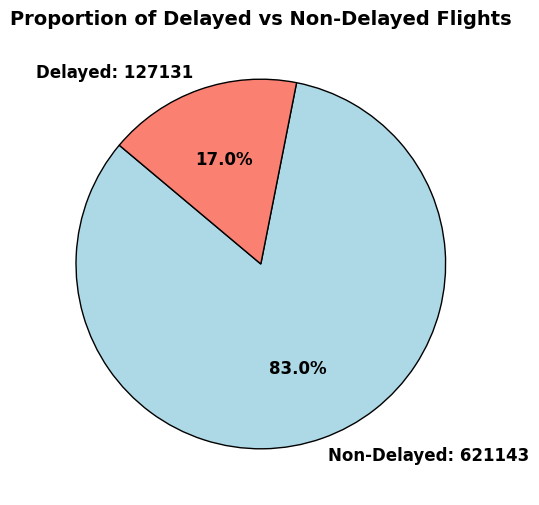

In [98]:
import matplotlib.pyplot as plt

# Count occurrences of delayed (1) and non-delayed (0) flights
delayed_counts = df_new['Delayed'].value_counts()

# Ensure both categories (0 and 1) exist, otherwise set default count to 0
non_delayed_count = delayed_counts.get(0, 0)  # Count of non-delayed flights
delayed_count = delayed_counts.get(1, 0)  # Count of delayed flights

# Labels for the pie chart
labels = [f'Non-Delayed: {non_delayed_count}', f'Delayed: {delayed_count}']

# Define colors
colors = ['lightblue', 'salmon']

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie([non_delayed_count, delayed_count], labels=labels, colors=colors,
        startangle=140, autopct='%1.1f%%',
        textprops={'fontsize': 12, 'fontweight': 'bold'}, wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Proportion of Delayed vs Non-Delayed Flights', fontsize=14, fontweight='bold')

# Show the plot
plt.show()




## **Delayed Percentage per Year**

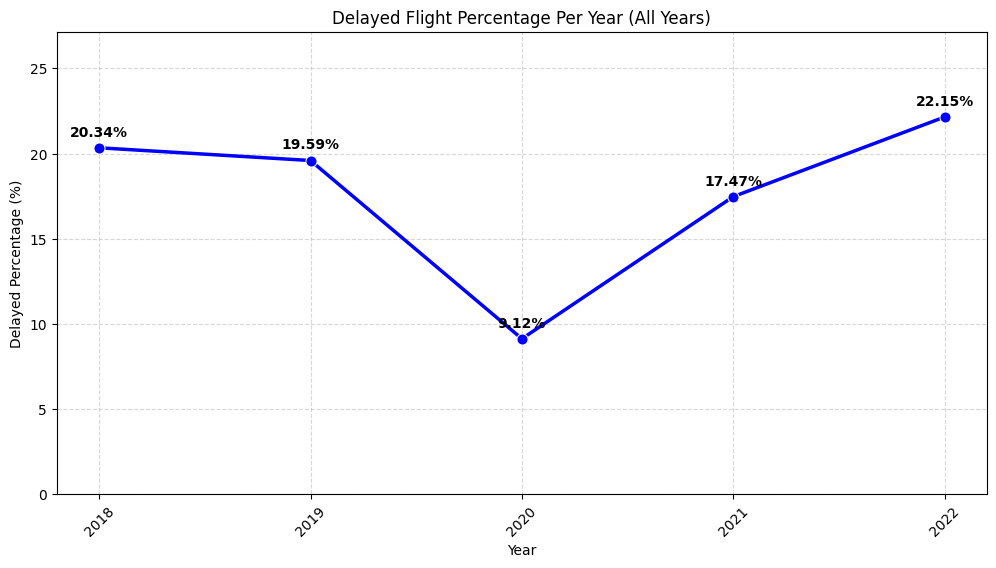

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Total Flights and Delayed Flights Per Year
df_yearly = df.groupby('Year').agg(
    total_flights=('ArrDel15', 'size'),  # Total flights per year
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count of delayed flights per year
).reset_index()

# Step 2: Calculate Delayed Percentage per Year
df_yearly['delayed_percentage'] = (df_yearly['delayed_flights'] / df_yearly['total_flights']) * 100

# Step 3: Sort Data by Year
df_yearly = df_yearly.sort_values(by='Year')

# Step 4: Create Line Plot with Data Labels
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Year', y='delayed_percentage', data=df_yearly, marker='o', color='b', linewidth=2.5, markersize=8)

# Add data labels on points
for index, row in df_yearly.iterrows():
    ax.text(row['Year'], row['delayed_percentage'] + 0.5,  # Position of the label
            f'{row["delayed_percentage"]:.2f}%',  # Format as 2 decimal places
            ha='center', va='bottom', fontsize=10, fontweight='bold')  # Styling

# Customize plot labels
plt.xlabel("Year")
plt.ylabel("Delayed Percentage (%)")
plt.title("Delayed Flight Percentage Per Year (All Years)")
plt.ylim(0, df_yearly['delayed_percentage'].max() + 5)  # Adjust y-axis for better visibility
plt.xticks(df_yearly['Year'], rotation=45)  # Show all years on the x-axis
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid for better readability

# Show the plot
plt.show()


## **Monthly Average Delay Minutes: Insights from Flight Data Analysis**

In [79]:
import pandas as pd
monthlyDep_delay = df.groupby('Month')['DepDelayMinutes'].mean()
print(monthlyDep_delay)

Month
1     12.088123
2     13.419126
3     11.365771
4     11.164026
5     12.490298
6     16.473315
7     16.048351
8     14.975193
9      9.666749
10    10.560121
11    10.122320
12    13.206791
Name: DepDelayMinutes, dtype: float64


In [80]:
monthly_delay = df.groupby('Month')['ArrDelayMinutes'].mean()
print(monthly_delay)

Month
1     12.116733
2     13.747883
3     11.230740
4     11.107351
5     12.421579
6     16.490955
7     16.095741
8     15.228009
9      9.766553
10    10.705658
11    10.180158
12    13.197579
Name: ArrDelayMinutes, dtype: float64


## **Average of Arrival and Departure Delay By months**

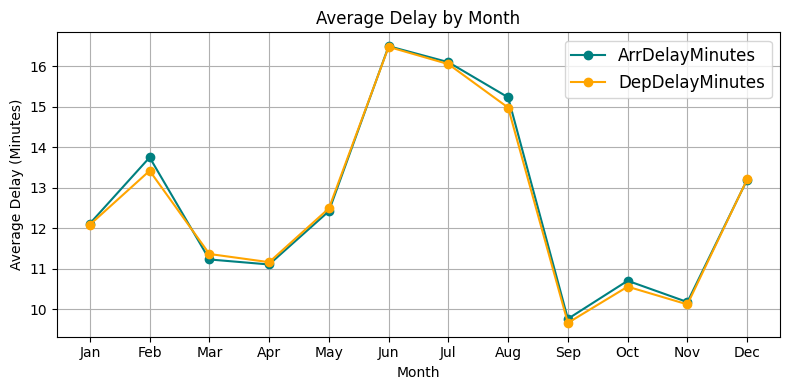

In [81]:
#  Average of DepartureDelay By months
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
monthly_delay.plot(kind='line', marker='o', color='teal', title='Average Delay by Month')
monthlyDep_delay.plot(kind='line', marker='o', color='Orange', title='Average Delay by Month')

plt.xlabel('Month')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

## **Delayed Percentage per Month**

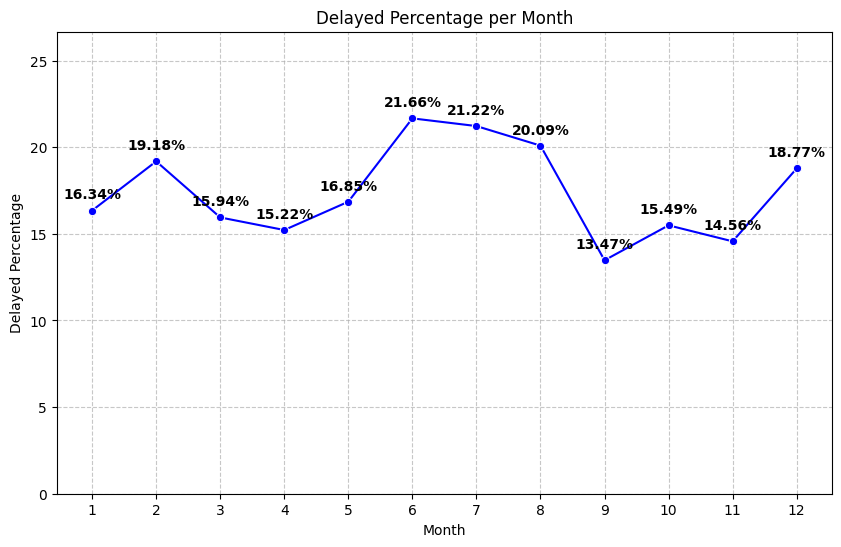

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Total Flights and Delayed Flights Per Month
df_monthly = df_new.groupby('Month').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per month
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per month
).reset_index()

# Step 2: Calculate Delayed Percentage per Month
df_monthly['delayed_percentage'] = (df_monthly['delayed_flights'] / df_monthly['total_flights']) * 100

# Step 3: Create Line Plot with Data Labels
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Month', y='delayed_percentage', data=df_monthly, marker='o', linestyle='-', color='b')

# Add data labels
for index, row in df_monthly.iterrows():
    ax.text(row['Month'], row['delayed_percentage'] + 0.5,  # Position of the label
            f'{row["delayed_percentage"]:.2f}%',  # Format the percentage with 2 decimal places
            ha='center', va='bottom', fontsize=10, fontweight='bold')  # Styling

# Customize plot labels
plt.xlabel("Month")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Month")
plt.xticks(df_monthly['Month'])
plt.ylim(0, df_monthly['delayed_percentage'].max() + 5)  # Adjust y-axis for visibility
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


## **Delayed Percentage per Day of the Week**

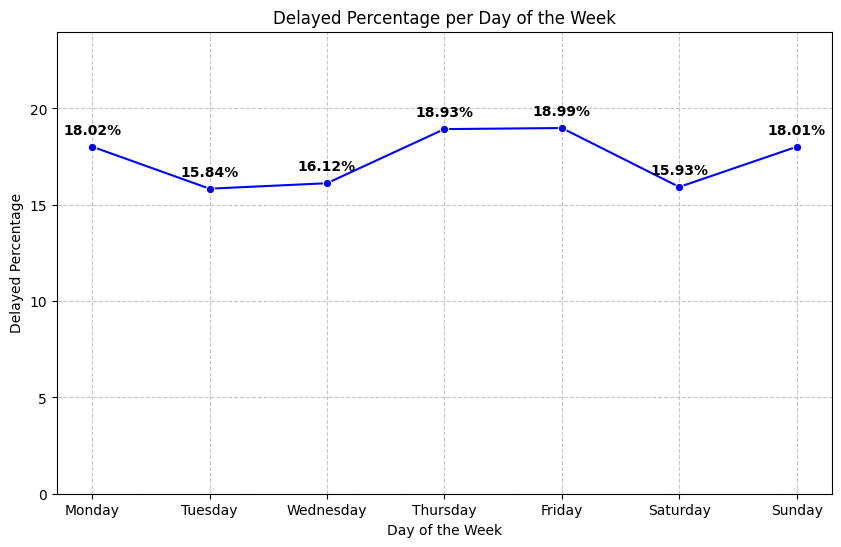

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Total Flights and Delayed Flights Per Day of the Week
df_weekday = df_new.groupby('DayOfWeek').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per day of the week
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per day of the week
).reset_index()

# Step 2: Calculate Delayed Percentage per Day of the Week
df_weekday['delayed_percentage'] = (df_weekday['delayed_flights'] / df_weekday['total_flights']) * 100

# Step 3: Create Line Plot with Data Labels
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='DayOfWeek', y='delayed_percentage', data=df_weekday, marker='o', linestyle='-', color='b')

# Add data labels
for index, row in df_weekday.iterrows():
    ax.text(row['DayOfWeek'], row['delayed_percentage'] + 0.5,  # Position of the label
            f'{row["delayed_percentage"]:.2f}%',  # Format with 2 decimal places
            ha='center', va='bottom', fontsize=10, fontweight='bold')  # Styling

# Customize plot labels
plt.xlabel("Day of the Week")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Day of the Week")
plt.xticks(df_weekday['DayOfWeek'], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylim(0, df_weekday['delayed_percentage'].max() + 5)  # Adjust y-axis for visibility
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


## **Delayed Percentage per Airline**

<ipython-input-84-e745000d6f20>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Airline', y='delayed_percentage', data=df_airline, palette='Blues')


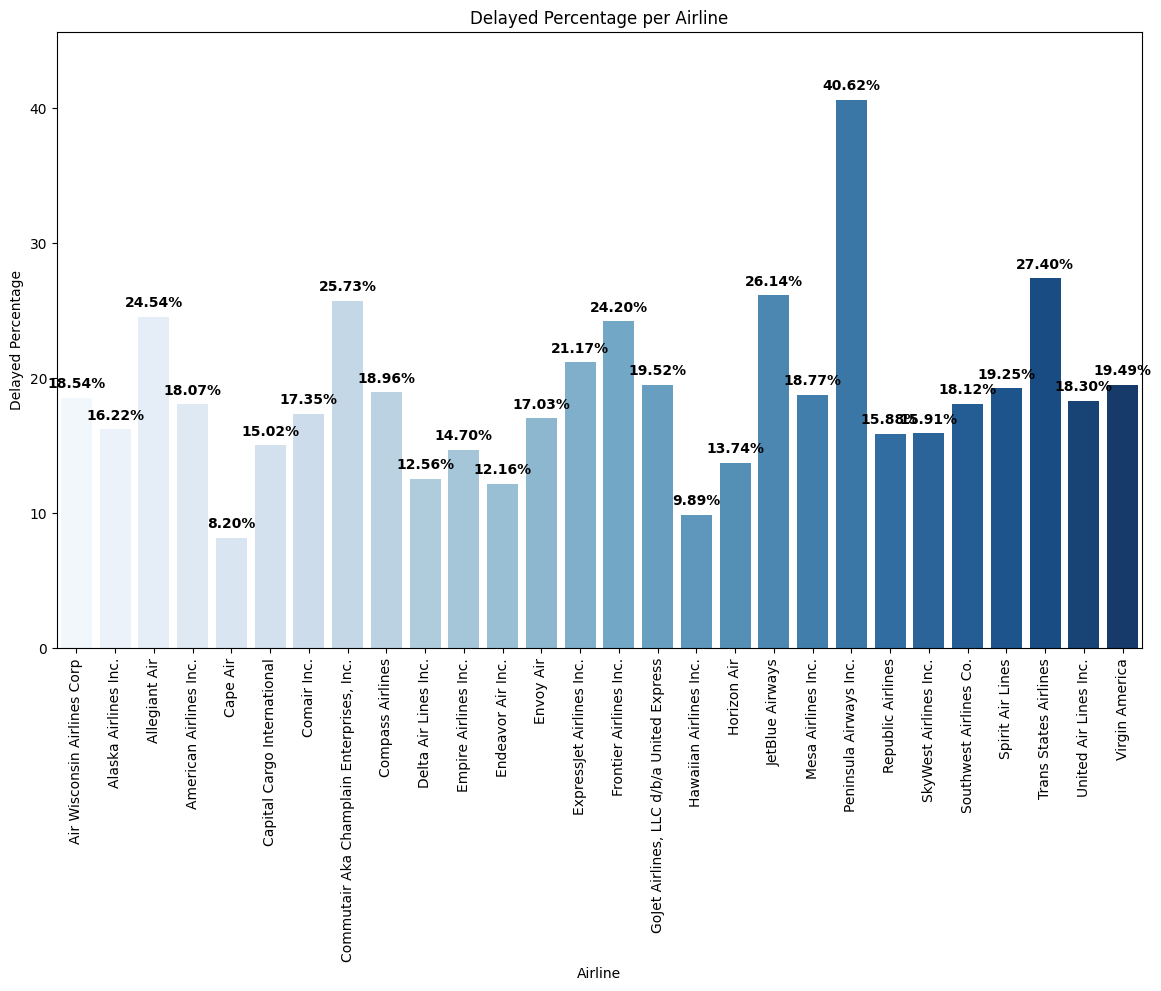

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Total Flights and Delayed Flights Per Airline
df_airline = df_new.groupby('Airline').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per airline
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per airline
).reset_index()

# Step 2: Calculate Delayed Percentage per Airline
df_airline['delayed_percentage'] = (df_airline['delayed_flights'] / df_airline['total_flights']) * 100

# Step 3: Create Bar Plot with Data Labels
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Airline', y='delayed_percentage', data=df_airline, palette='Blues')

# Add data labels
for index, row in df_airline.iterrows():
    ax.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
            f'{row["delayed_percentage"]:.2f}%',  # Format with 2 decimal places
            ha='center', va='bottom', fontsize=10, fontweight='bold')  # Styling

# Customize plot labels
plt.xlabel("Airline")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Airline")
plt.xticks(rotation=90)  # Rotate airline names for better readability
plt.ylim(0, df_airline['delayed_percentage'].max() + 5)  # Adjust y-axis for visibility

# Show the plot
plt.show()


 ## **Delayed Percentage per Airline**

In [85]:
import pandas as pd
from tabulate import tabulate

# Step 1: Calculate Total Flights and Delayed Flights Per Airline
df_airline = df_new.groupby('Airline').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per airline
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per airline
).reset_index()

# Step 2: Calculate Delayed Percentage per Airline
df_airline['delayed_percentage'] = (df_airline['delayed_flights'] / df_airline['total_flights']) * 100

# Step 3: Display as a table
df_airline = df_airline.sort_values(by='delayed_percentage', ascending=False)  # Sort by delayed percentage
df_airline.rename(columns={
    'Airline': 'Airline Name',
    'total_flights': 'Total Flights',
    'delayed_flights': 'Delayed Flights',
    'delayed_percentage': 'Delayed Percentage (%)'
}, inplace=True)

# Print table format using tabulate for better readability
print(tabulate(df_airline, headers='keys', tablefmt='pretty', showindex=False))


+-------------------------------------------+---------------+-----------------+------------------------+
|               Airline Name                | Total Flights | Delayed Flights | Delayed Percentage (%) |
+-------------------------------------------+---------------+-----------------+------------------------+
|          Peninsula Airways Inc.           |      64       |       26        |         40.625         |
|           Trans States Airlines           |     3861      |      1058       |   27.402227402227403   |
|              JetBlue Airways              |     29237     |      7644       |   26.144953312583368   |
| Commutair Aka Champlain Enterprises, Inc. |     6479      |      1667       |   25.72927920975459    |
|               Allegiant Air               |     12615     |      3096       |   24.542211652794293   |
|          Frontier Airlines Inc.           |     15254     |      3692       |   24.203487609807265   |
|         ExpressJet Airlines Inc.          |     9174 

## **TOP 10 Origin With Highest Average Flight Departure Delay**

<ipython-input-86-722d2eeb9f74>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_origin.values, y=top_10_origin.index, palette='viridis')


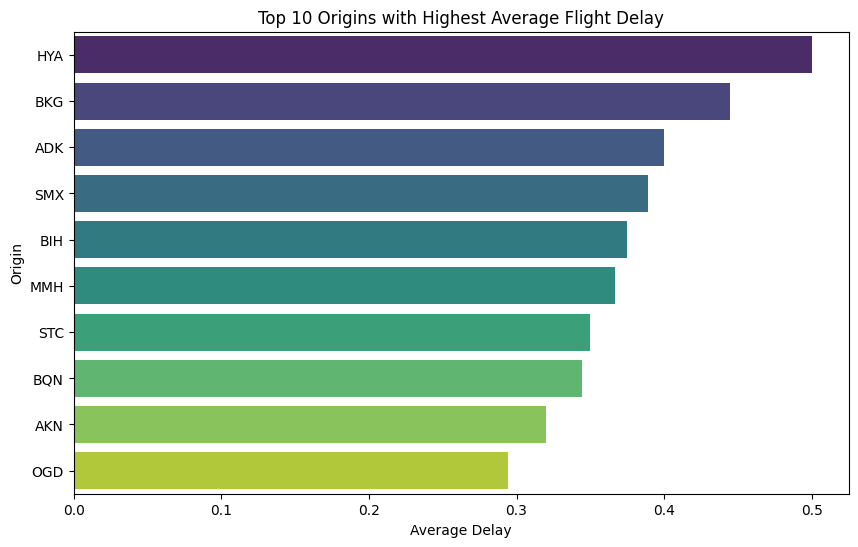

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the average delay probability for each origin
delay_by_origin = df.groupby("Origin")["DepDel15"].mean().sort_values(ascending=False)

# Select the top 10 origins with the highest average delay
top_10_origin = delay_by_origin.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_origin.values, y=top_10_origin.index, palette='viridis')
plt.title('Top 10 Origins with Highest Average Flight Delay')
plt.xlabel('Average Delay')
plt.ylabel('Origin')
plt.show()


## **Delayed Percentage per Origin**

In [87]:
import pandas as pd

# Step 1: Calculate Total Flights and Delayed Flights Per Origin
df_origin = df_new.groupby('Origin').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per origin
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per origin
).reset_index()

# Step 2: Calculate Delayed Percentage per Origin
df_origin['delayed_percentage'] = (df_origin['delayed_flights'] / df_origin['total_flights']) * 100

# Step 3: Display all rows sorted by delayed_percentage in descending order
pd.set_option('display.max_rows', None)  # Show all rows
df_origin_display = df_origin.sort_values(by='delayed_percentage', ascending=False)

# Print the table
print(df_origin_display)


    Origin  total_flights  delayed_flights  delayed_percentage
65     CDB             15                8           53.333333
171    HYA              8                4           50.000000
43     BKG              9                4           44.444444
345    SMX             18                7           38.888889
244    MMH             30               11           36.666667
153    GST             12                4           33.333333
13     AKN             25                8           32.000000
374    UIN             45               14           31.111111
209    LCK            138               42           30.434783
52     BQN            238               72           30.252101
9      ADK             10                3           30.000000
366    TTN            275               82           29.818182
174    IAG             81               24           29.629630
22     ASE            588              174           29.591837
328    SCK             99               28           28

## **Total Flights and Delayed Flights Per Destination**

In [88]:
import pandas as pd

# Step 1: Calculate Total Flights and Delayed Flights Per Destination
df_dest = df_new.groupby('Dest').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per destination
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per destination
).reset_index()

# Step 2: Calculate Delayed Percentage per Destination
df_dest['delayed_percentage'] = (df_dest['delayed_flights'] / df_dest['total_flights']) * 100

# Step 3: Display all rows sorted by delayed_percentage in descending order
pd.set_option('display.max_rows', None)  # Show all rows
df_dest_display = df_dest.sort_values(by='delayed_percentage', ascending=False)

# Print the table
print(df_dest_display)


    Dest  total_flights  delayed_flights  delayed_percentage
109  DUT             36               23           63.888889
39   BIH              6                3           50.000000
43   BKG             10                5           50.000000
345  SMX             24               11           45.833333
196  JST             20                7           35.000000
351  STC             23                8           34.782609
293  PSE             81               26           32.098765
295  PSM             41               13           31.707317
290  PQI             51               16           31.372549
52   BQN            200               62           31.000000
171  HYA             13                4           30.769231
254  MVY             65               19           29.230769
374  UIN             45               13           28.888889
35   BFM              7                2           28.571429
331  SFB           1157              329           28.435609
276  PGD            681 

## **Delayed Percentage per Operating Airline**

<ipython-input-89-9d5578826ee7>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Operating_Airline', y='delayed_percentage', data=df_operating_airline, palette='Blues')


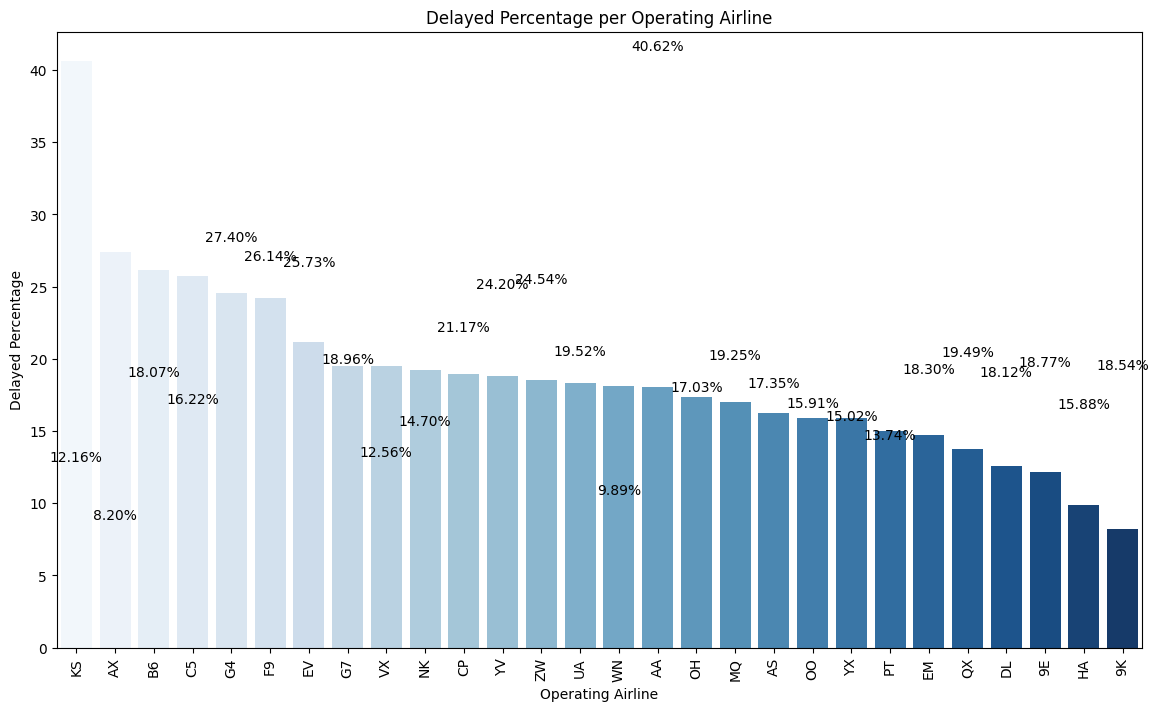

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Total Flights and Delayed Flights Per Operating Airline
df_operating_airline = df_new.groupby('Operating_Airline').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per operating airline
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per operating airline
).reset_index()

# Step 2: Calculate Delayed Percentage per Operating Airline
df_operating_airline['delayed_percentage'] = (df_operating_airline['delayed_flights'] / df_operating_airline['total_flights']) * 100

# Step 3: Sort the values by delayed percentage
df_operating_airline = df_operating_airline.sort_values(by='delayed_percentage', ascending=False)

# Step 4: Create a Bar Plot with Delayed Percentage
plt.figure(figsize=(14, 8))
sns.barplot(x='Operating_Airline', y='delayed_percentage', data=df_operating_airline, palette='Blues')

# Add data labels for Delayed Percentage
for index, row in df_operating_airline.iterrows():
    plt.text(row.name, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the delayed percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

plt.xlabel("Operating Airline")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Operating Airline")
plt.xticks(rotation=90)  # Rotate airline names for better readability
plt.show()


## **Delayed Percentage per Distance Group**

<ipython-input-90-2fecfac3ca03>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DistanceRange', y='delayed_percentage', data=df_distance_group, palette='Blues')


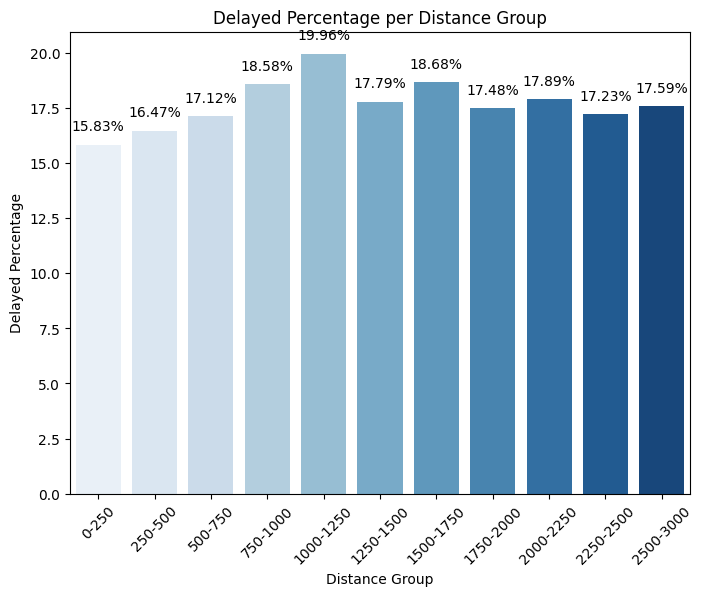

'\nso here we can see that their is not a pecific pattern with distance group so we can not say that the distance group is the main factor for the delay\n'

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Total Flights and Delayed Flights Per Distance Group
df_distance_group = df_new.groupby('DistanceGroup').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per distance group
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per distance group
).reset_index()

# Step 2: Calculate Delayed Percentage per Distance Group
df_distance_group['delayed_percentage'] = (df_distance_group['delayed_flights'] / df_distance_group['total_flights']) * 100

# Step 3: Map numerical distance groups to actual range labels
distance_ranges = {
    1: '0-250',
    2: '250-500',
    3: '500-750',
    4: '750-1000',
    5: '1000-1250',
    6: '1250-1500',
    7: '1500-1750',
    8: '1750-2000',
    9: '2000-2250',
    10: '2250-2500',
    11: '2500-3000'
}

# Replace the numerical labels with actual range labels
df_distance_group['DistanceRange'] = df_distance_group['DistanceGroup'].map(distance_ranges)

# Step 4: Sort the values by delayed percentage
df_distance_group = df_distance_group.sort_values(by='delayed_percentage', ascending=False)

# Step 5: Make 'DistanceRange' a categorical column with the correct order
df_distance_group['DistanceRange'] = pd.Categorical(df_distance_group['DistanceRange'],
                                                     categories=['0-250', '250-500', '500-750', '750-1000',
                                                                '1000-1250', '1250-1500', '1500-1750',
                                                                '1750-2000', '2000-2250', '2250-2500', '2500-3000'],
                                                     ordered=True)

# Step 6: Create a Bar Plot with Delayed Percentage using the actual distance range labels
plt.figure(figsize=(8, 6))
sns.barplot(x='DistanceRange', y='delayed_percentage', data=df_distance_group, palette='Blues')

# Add data labels for Delayed Percentage
for index, row in df_distance_group.iterrows():
    plt.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the delayed percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

# Labeling axes and title
plt.xlabel("Distance Group")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Distance Group")
plt.xticks(rotation=45)
plt.show()



"""
so here we can see that their is not a pecific pattern with distance group so we can not say that the distance group is the main factor for the delay
"""


## **Average Arrival Delay Based on Differrent Periods Of Day**


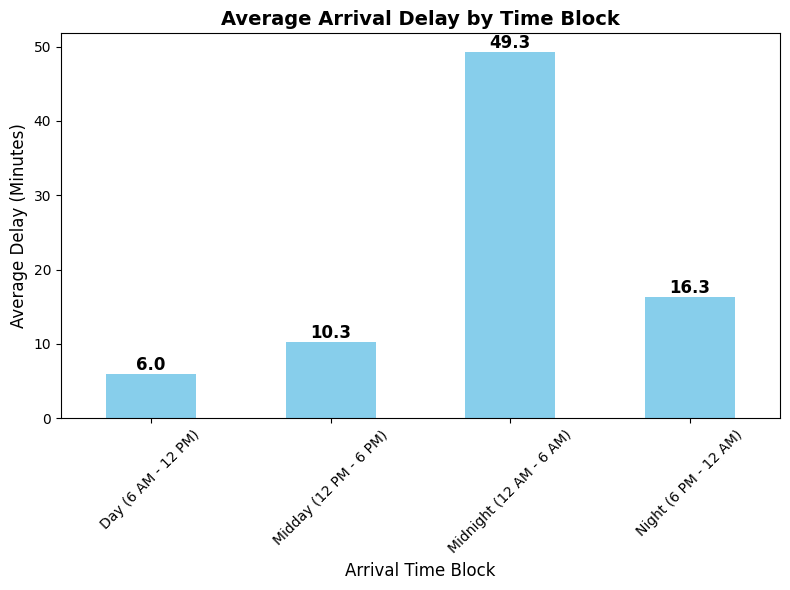

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to categorize arrival time into blocks
def categorize_time(arr_time):
    if 600 <= arr_time < 1200:
        return 'Day (6 AM - 12 PM)'
    elif 1200 <= arr_time < 1800:
        return 'Midday (12 PM - 6 PM)'
    elif 1800 <= arr_time < 2400:
        return 'Night (6 PM - 12 AM)'
    else:
        return 'Midnight (12 AM - 6 AM)'

# Apply the function to create a new column
df_new['ArrivalTimeBlock'] = df_new['ArrTime'].apply(categorize_time)

# Calculate average delay per time block
time_block_delay = df_new.groupby('ArrivalTimeBlock')['ArrDelayMinutes'].mean()

# Create a figure with adjusted size and layout
plt.figure(figsize=(8, 6))

# Plot the bar chart
ax = time_block_delay.plot(kind='bar', color='skyblue')

# Add data labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',  # Format to 1 decimal place
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize the plot
plt.xlabel('Arrival Time Block', fontsize=12)
plt.ylabel('Average Delay (Minutes)', fontsize=12)
plt.title('Average Arrival Delay by Time Block', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## **ANALYSIS BASED ON ROUTE**

In [92]:
df['Route'] = df['Origin'] + ' → ' + df['Dest']

In [93]:
route_delay = df.groupby('Route')['ArrDelayMinutes'].mean().reset_index()

## **Top 20 Routes with Highest Average Arrival Delay**

In [94]:
top_20_routes = route_delay.sort_values(by='ArrDelayMinutes', ascending=False).head(20)
print(top_20_routes)

          Route  ArrDelayMinutes
718   BNA → MLB       646.000000
2885  HHH → CLE       479.500000
1292  CLT → IPT       370.500000
1046  BZN → PHL       297.750000
3911  LEX → FLL       292.857143
6868  SJU → AUS       287.875000
4718  MSP → ISP       272.000000
5322  ORH → LGA       264.750000
1077  CAK → SAV       239.000000
2839  GSP → LAS       228.000000
2547  FAY → DFW       227.142857
1530  DAB → DTW       227.000000
1494  CVG → MKE       217.500000
4914  MYR → TYS       214.500000
158   APN → PLN       206.000000
2282  DTW → TUL       201.250000
4437  MHT → RSW       197.000000
6389  SAT → SJC       192.000000
356   ATY → PIR       183.750000
171   ASE → SNA       183.000000


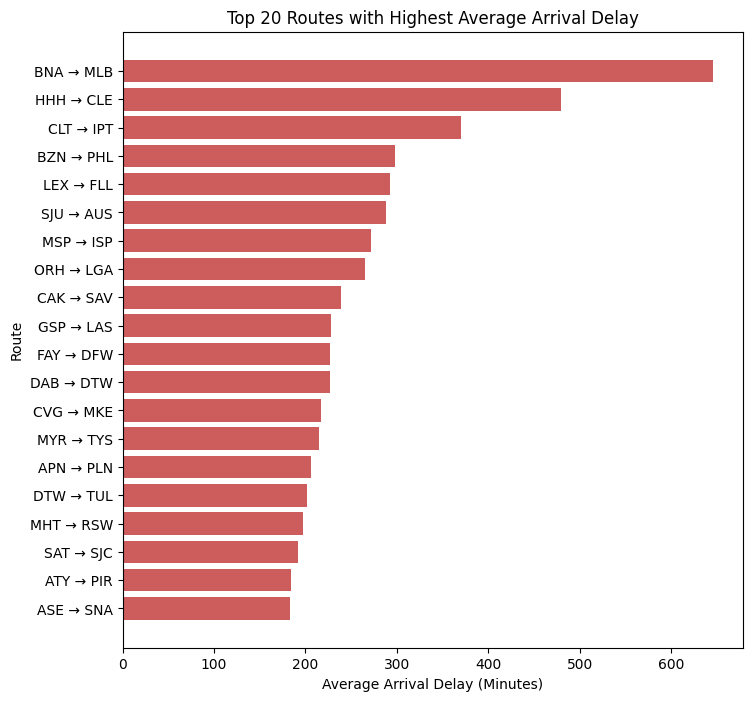

In [95]:
plt.figure(figsize=(8, 8))
plt.barh(top_20_routes['Route'], top_20_routes['ArrDelayMinutes'], color='indianred')
plt.xlabel('Average Arrival Delay (Minutes)')
plt.ylabel('Route')
plt.title('Top 20 Routes with Highest Average Arrival Delay')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

## **Feature Correlation with DepDelay and ArrDelay**

                      DepDelayMinutes  ArrDel15
DepDelayMinutes              1.000000  0.517606
DepDelay                     0.996803  0.535110
ArrDelayMinutes              0.979292  0.554784
ArrDelay                     0.959527  0.602577
DepartureDelayGroups         0.831567  0.686378
ArrivalDelayGroups           0.781801  0.762402
DepDel15                     0.560356  0.746303
ArrDel15                     0.517606  1.000000
Hour                         0.117818  0.173431
DepTime                      0.117285  0.172577


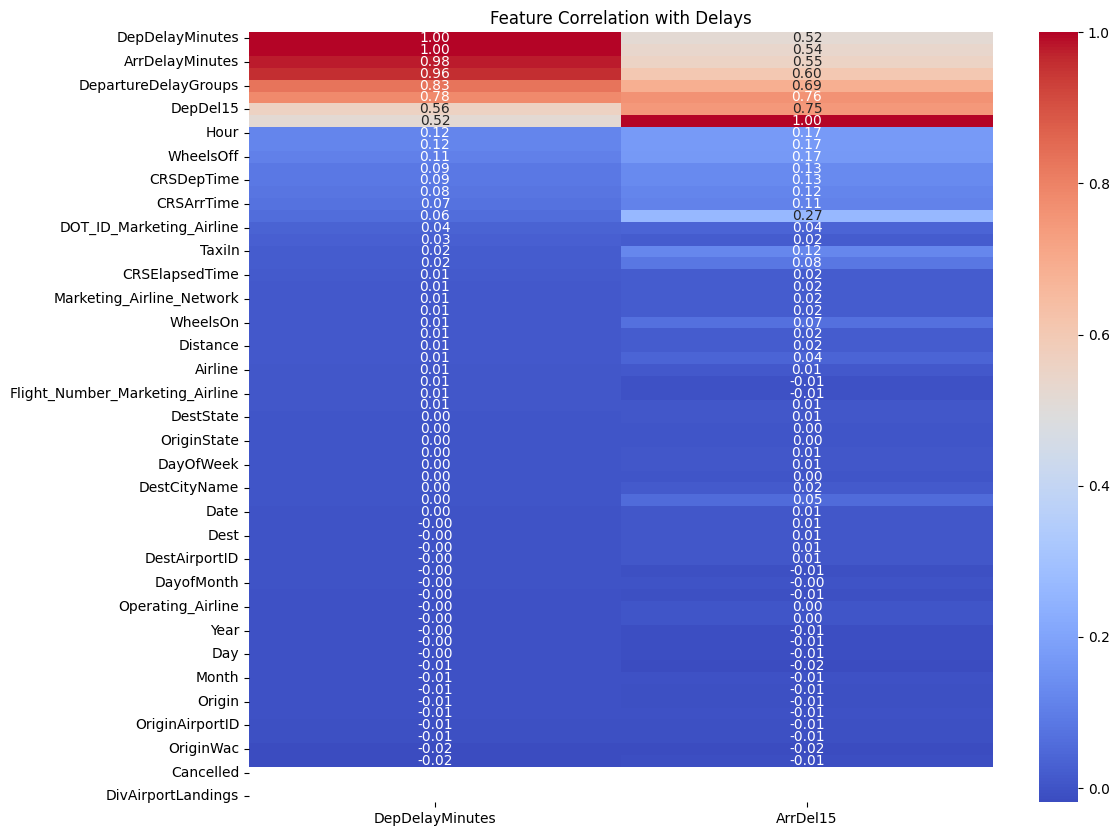

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 1: Selecting numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Step 2: Encoding categorical columns using Label Encoding
df_encoded = df.copy()  # Create a copy to avoid modifying the original data
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df_encoded[col] = label_encoders[col].fit_transform(df_encoded[col])

# Step 3: Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Step 4: Extract correlations of delay-related columns
delay_correlations = correlation_matrix[['DepDelayMinutes', 'ArrDel15']].sort_values(
    by=['DepDelayMinutes', 'ArrDel15'], ascending=False
)

# Step 5: Display top correlated features
print(delay_correlations.head(10))

# Step 6: Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(delay_correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Delays")
plt.show()


## **ANALYSIS ON TAXI IN AND TAXI OUT**

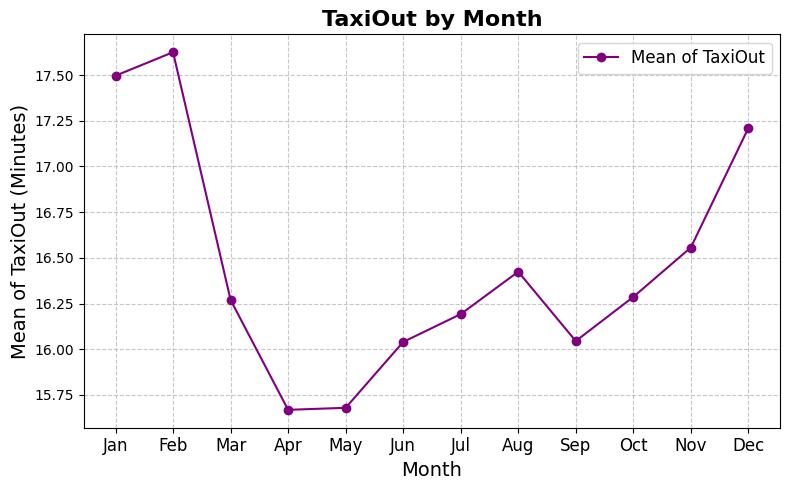

In [74]:
# Group by 'Month' and find the mode of 'TaxiOut'
taxiout_mode_by_month = df.groupby('Month')['TaxiOut'].mean()

# Plot the mode of TaxiOut by month
plt.figure(figsize=(8, 5))
plt.plot(taxiout_mode_by_month.index, taxiout_mode_by_month.values, marker='o', linestyle='-', color='purple', label='Mean of TaxiOut')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Mean of TaxiOut (Minutes)', fontsize=14)
plt.title('TaxiOut by Month', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## **Percentage of Delay Flights with City**

In [75]:
# Group by destination and count the number of delayed flights
delayed_by_dest = df_new.groupby('DestCityName')['ArrDel15'].sum().reset_index()

# Count total flights per destination
total_flights_by_dest = df_new.groupby('DestCityName')['ArrDel15'].count().reset_index()

# Merge both dataframes
delayed_by_dest = delayed_by_dest.merge(total_flights_by_dest, on='DestCityName', suffixes=('_delayed', '_total'))

# Calculate percentage of delayed flights
delayed_by_dest['Delay_Percentage'] = (delayed_by_dest['ArrDel15_delayed'] / delayed_by_dest['ArrDel15_total']) * 100

# Sort the cities by percentage of delayed flights
delayed_by_dest_sorted = delayed_by_dest.sort_values(by='Delay_Percentage', ascending=False)

# Print the top 10 cities with the highest percentage of delayed flights
print(delayed_by_dest_sorted[['DestCityName', 'Delay_Percentage']].head(10))

                 DestCityName  Delay_Percentage
354              Unalaska, AK         63.888889
37                 Bishop, CA         50.000000
44                Branson, MO         50.000000
317           Santa Maria, CA         45.833333
169             Johnstown, PA         35.000000
334             St. Cloud, MN         34.782609
274                 Ponce, PR         32.098765
277            Portsmouth, NH         31.707317
279  Presque Isle/Houlton, ME         31.372549
3               Aguadilla, PR         31.000000


## **Feature Categories Based on Correlation with 'Delayed**

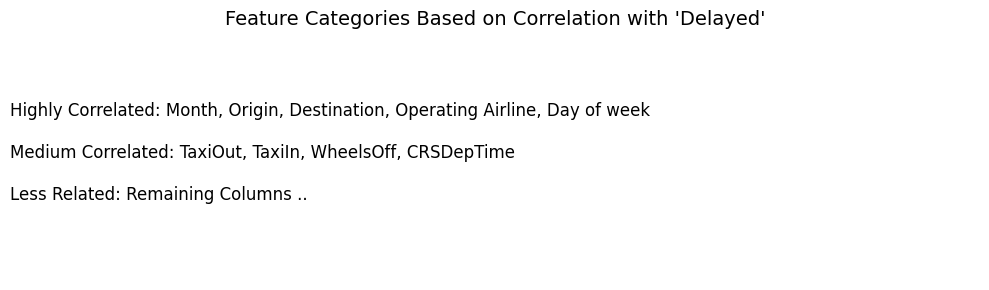

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the categories based on your analysis
highly_correlated = ['Month', 'Origin', 'Destination', 'Operating Airline', 'Day of week']
medium_correlated = ['TaxiOut', 'TaxiIn', 'WheelsOff', 'CRSDepTime']
less_related = ['Remaining Columns ..']  # Remaining columns are grouped here

# Create a DataFrame to represent these categories and their counts
category_data = {
    'Category': ['Highly Correlated', 'Medium Correlated', 'Less Related'],
    'Features': [', '.join(highly_correlated), ', '.join(medium_correlated), ', '.join(less_related)],
}

category_df = pd.DataFrame(category_data)

# Plotting the graph
plt.figure(figsize=(10, 3))

# Create the plot by simply using text to display categories and their features
plt.text(0, 0.72, f"Highly Correlated: {category_df['Features'][0]}", fontsize=12, ha='left', va='top')
plt.text(0, 0.55, f"Medium Correlated: {category_df['Features'][1]}", fontsize=12, ha='left', va='top')
plt.text(0, 0.38, f"Less Related: {category_df['Features'][2]}", fontsize=12, ha='left', va='top')

# Remove the axis
plt.axis('off')

# Customize the plot with title
plt.title("Feature Categories Based on Correlation with 'Delayed'", fontsize=14)

# Adjust layout to ensure the text fits properly
plt.tight_layout()

# Show plot
plt.show()
